# Перегляд VIDEO через OpenCV  і пропускання окремих кадрів для детекції через нейномережу


## Відкриваємо наявне відео і проганяємо кожний 10-тий кадр через детекцію нейромережі. Обмежено 5 ітерецій 


0: 384x640 15 persons, 1 stop sign, 2 wine glasss, 120.1ms
Speed: 8.0ms preprocess, 120.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


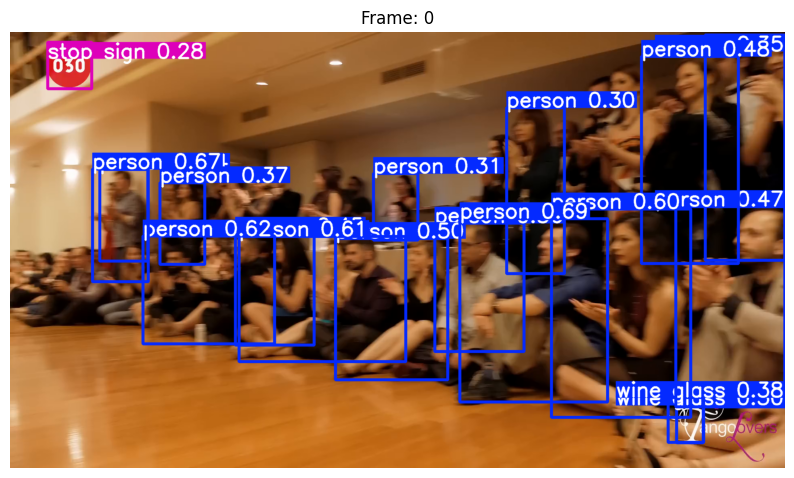


0: 384x640 15 persons, 1 stop sign, 1 wine glass, 127.1ms
Speed: 7.6ms preprocess, 127.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


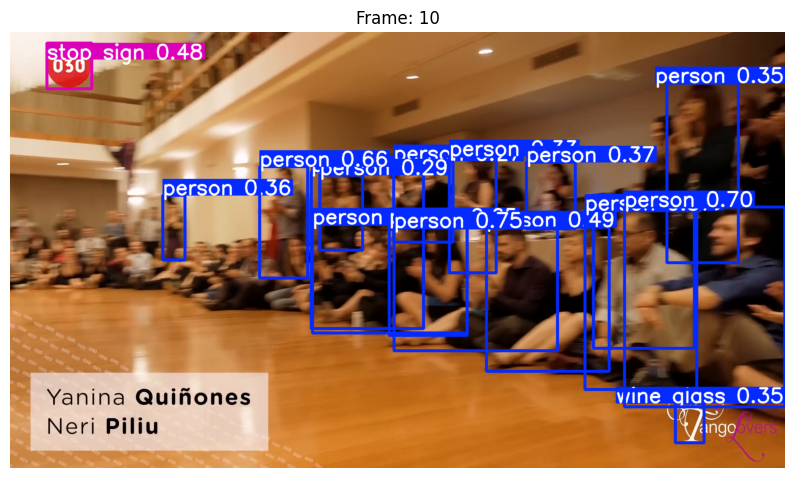


0: 384x640 12 persons, 1 stop sign, 129.1ms
Speed: 7.0ms preprocess, 129.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


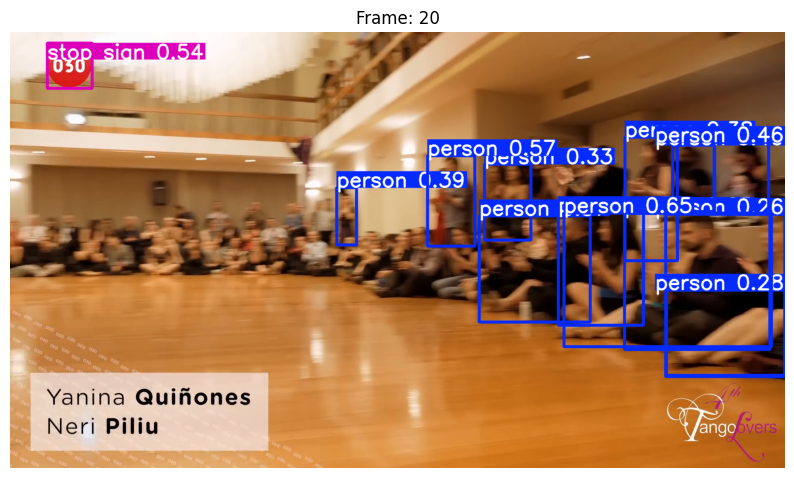


0: 384x640 4 persons, 1 motorcycle, 1 stop sign, 69.7ms
Speed: 4.8ms preprocess, 69.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


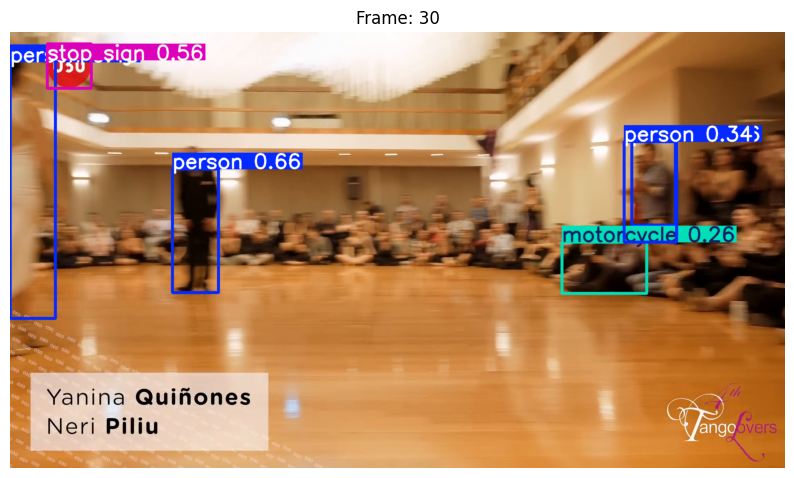


0: 384x640 3 persons, 1 bicycle, 1 motorcycle, 1 stop sign, 502.9ms
Speed: 18.4ms preprocess, 502.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


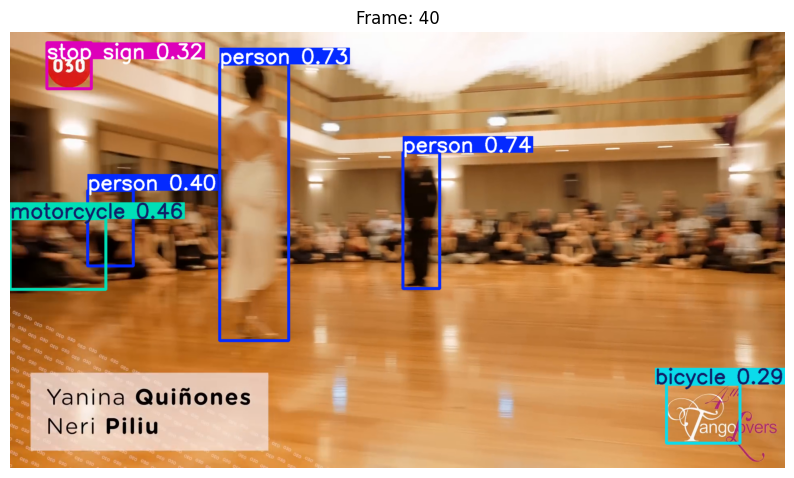


0: 384x640 15 persons, 167.1ms
Speed: 6.5ms preprocess, 167.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


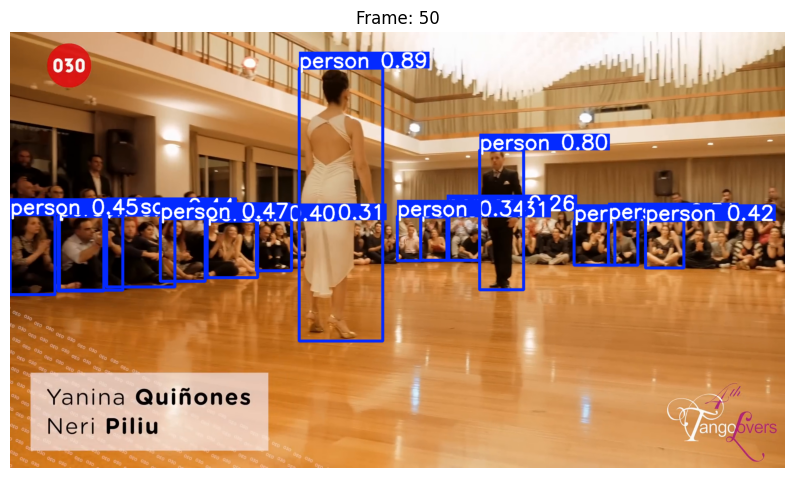

In [12]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Завантажуємо модель (використову ту саму, що в tasks.py)
model = YOLO("yolov8n.pt") 

video_path = "video/tango.mp4"
cap = cv2.VideoCapture(video_path)

frame_step = 10  # Відображати кожен 10-й кадр
count = 0
countdispl=0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    if count % frame_step == 0:
        # Робимо детекцію
        results = model(frame, conf=0.25) # Спробуйте змінити conf для тесту
        
        # Візуалізуємо результат
        res_plotted = results[0].plot()
        
        # Перетворюємо BGR в RGB для коректного відображення в Matplotlib
        res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 6))
        plt.imshow(res_rgb)
        plt.title(f"Frame: {count}")
        plt.axis('off')
        plt.show()
        countdispl +=1
        
    count += 1
    if countdispl > 5:
        break
        
cap.release()

## Завантажити відео з yourtube

In [7]:
import yt_dlp

def download_youtube_video(url, output_path='.', obj_name='video'):
    ydl_opts = {
        # Змінюємо пріоритет: шукаємо саме h264 (avc1), який є стандартом для OpenCV
        'format': 'bestvideo[vcodec^=avc1][ext=mp4]+bestaudio[ext=m4a]/best[vcodec^=avc1][ext=mp4]/best',
        'outtmpl': f'{output_path}/{obj_name}.%(ext)s',
        'noplaylist': True,
        # Додаємо merge_output_format, щоб на виході точно був mp4
        'merge_output_format': 'mp4',
    }
    
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        print(f"Завантаження відео з URL: {url}...")
        ydl.download([url])
        print("Завантаження завершено!")
    
    return f'{obj_name}.mp4'

## Пробуємо завантажити та відкрити відео щоб  отримати його параметри

In [8]:
import cv2

video_file = download_youtube_video("https://www.youtube.com/watch?v=YFyTwSoAjyI", obj_name="tango_test")
video_file = "video/tango.mp4"

cap = cv2.VideoCapture(video_file)
if not cap.isOpened():
    print("ПОМИЛКА: OpenCV все ще не може відкрити файл!")
else:
    # Отримуємо назву кодека (через 4CC код)
    fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
    codec = "".join([chr((fourcc >> 8 * i) & 0xFF) for i in range(4)])
    print(f"Успіх! Відео відкрито. Кодек файлу: {codec}")
    
    # Виводимо технічні параметри
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print(f"Роздільна здатність: {int(width)}x{int(height)}, FPS: {fps}")
cap.release()

Завантаження відео з URL: https://www.youtube.com/watch?v=YFyTwSoAjyI...
[youtube] Extracting URL: https://www.youtube.com/watch?v=YFyTwSoAjyI
[youtube] YFyTwSoAjyI: Downloading webpage


[youtube] YFyTwSoAjyI: Downloading android vr player API JSON
[info] YFyTwSoAjyI: Downloading 1 format(s): 137+140
[download] Destination: ./tango_test.f137.mp4
[download] 100% of   56.30MiB in 00:00:06 at 8.34MiB/s     
[download] Destination: ./tango_test.f140.m4a
[download] 100% of    2.92MiB in 00:00:00 at 7.77MiB/s   
[Merger] Merging formats into "./tango_test.mp4"
Deleting original file ./tango_test.f137.mp4 (pass -k to keep)
Deleting original file ./tango_test.f140.m4a (pass -k to keep)
Завантаження завершено!
Успіх! Відео відкрито. Кодек файлу: h264
Роздільна здатність: 1920x1080, FPS: 25.0



0: 384x640 15 persons, 1 stop sign, 2 wine glasss, 176.8ms
Speed: 5.6ms preprocess, 176.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


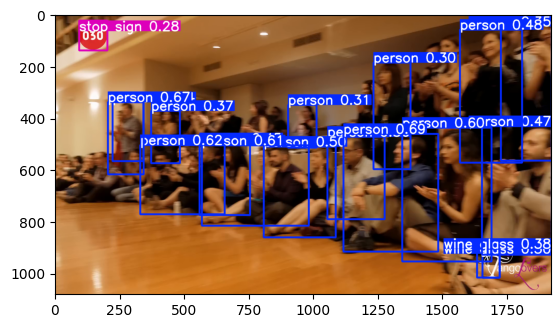

In [9]:
# Приклад для ноутбука
cap = cv2.VideoCapture("video/tango.mp4")
success, frame = cap.read()
if success:
    results = model(frame) # YOLO почне працювати!
    plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
    plt.show()